## Importing all decrepencies


In [33]:
!pip install tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras import models, layers

tf.__version__

'2.11.0'

## Fetching dataset of training data
### Fetching total of 4 Classes of brain-tumor in the batch of 32 images each of size 256x256

In [34]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"train", shuffle=True, image_size=(256, 256), batch_size=32)
class_names = dataset.class_names
class_names

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
"test", shuffle=True, image_size=(256, 256), batch_size=32)
class_names = testing_dataset.class_names

Found 3643 files belonging to 23 classes.
Found 1049 files belonging to 23 classes.


### Visualize some of the images from the dataset


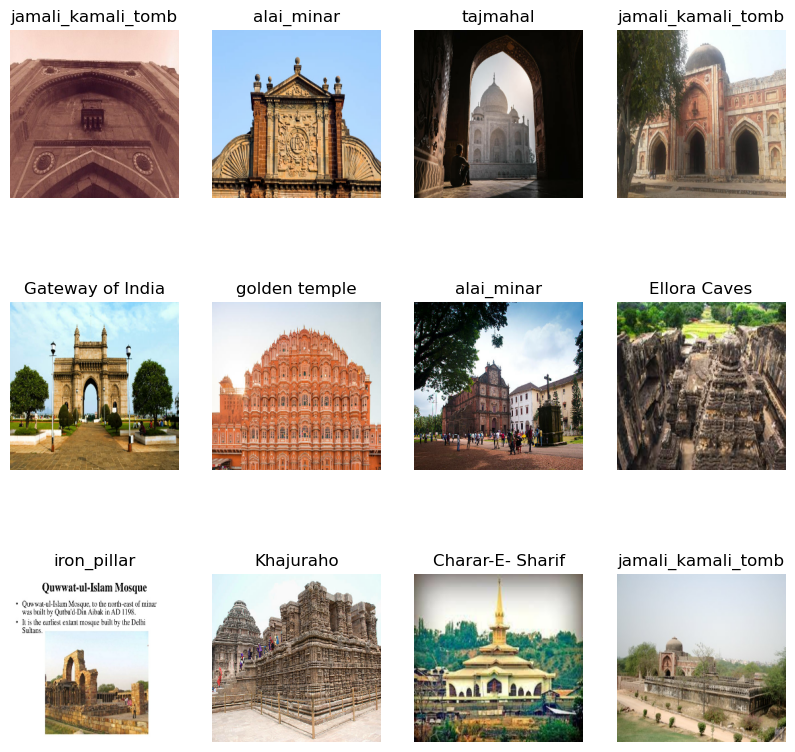

In [35]:
%matplotlib inline

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## Splitting data into 3 sets (training data, validation data, test data)

In [36]:
train_size = 0.8

train_dataset = dataset.take(91)

val_size = 0.2

val_dataset = dataset.take(23)

test_dataset = testing_dataset

In [37]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### Creating a Layer for Resizing and Normalization and Data Augmentation

In [38]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

## Comipling and Fitting data into the model

In [39]:
input_shape = (32, 256, 256, 3)
n_classes = 23

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [41]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history = model.fit(
    train_dataset,
    batch_size = 32,
    validation_data = val_dataset,¸
    verbose = 1,
    epochs = 20,
)

Epoch 1/5
91/91 [==============================] - 50s 542ms/step - loss: 1.4508 - accuracy: 0.5652 - val_loss: 1.1954 - val_accuracy: 0.6277
Epoch 2/5
91/91 [==============================] - 55s 604ms/step - loss: 1.2221 - accuracy: 0.6408 - val_loss: 0.9491 - val_accuracy: 0.7065
Epoch 3/5
91/91 [==============================] - 63s 691ms/step - loss: 1.0555 - accuracy: 0.6686 - val_loss: 0.9675 - val_accuracy: 0.7052
Epoch 4/5
91/91 [==============================] - 81s 886ms/step - loss: 0.9031 - accuracy: 0.7332 - val_loss: 0.6715 - val_accuracy: 0.7935
Epoch 5/5
91/91 [==============================] - 62s 679ms/step - loss: 0.7354 - accuracy: 0.7809 - val_loss: 0.4996 - val_accuracy: 0.8424


## Test Evaluation

[loss, accuracy]

In [43]:
scores = model.evaluate(test_dataset)
scores

33/33 [==============================] - 5s 144ms/step - loss: 4.7582 - accuracy: 0.3613


[4.758152961730957, 0.36129647493362427]

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Ploting graph to visualize loss and accuracy on training and validation data

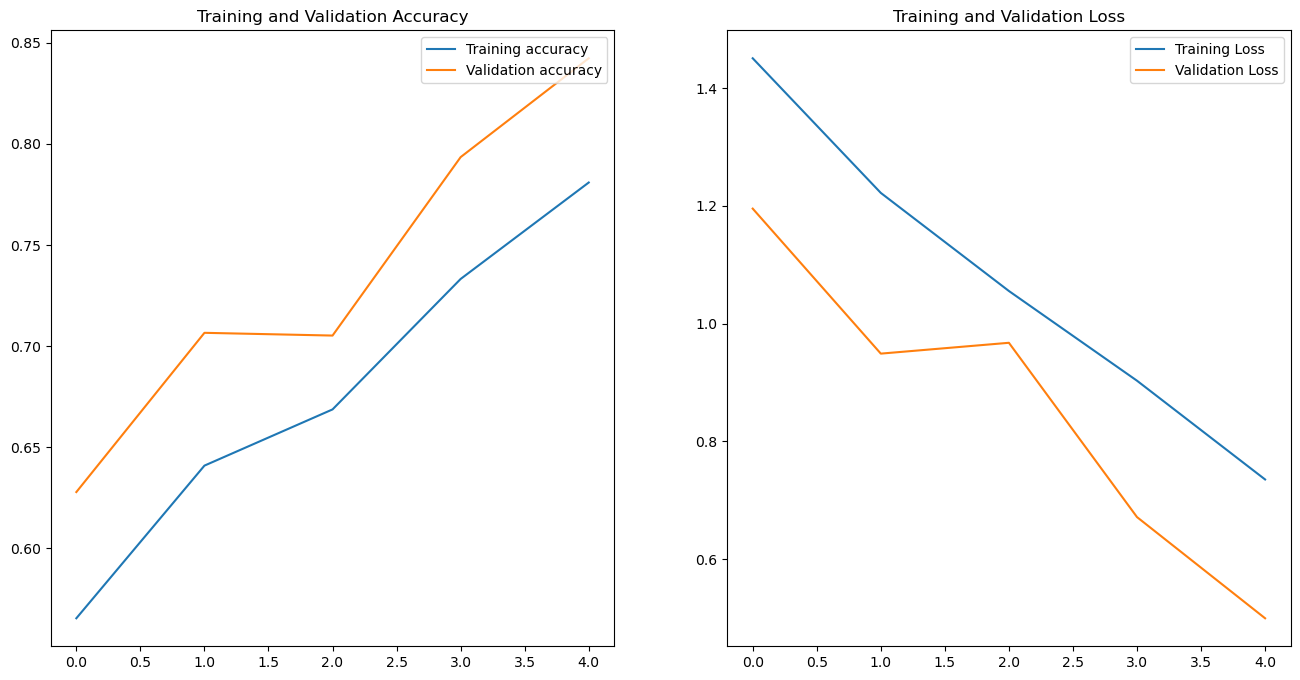

<Figure size 640x480 with 0 Axes>

In [45]:
%matplotlib inline

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training accuracy')
plt.plot(range(20), val_acc, label='Validation accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('graph.png')

### Running prediction on a sample image

1/1 [==============================] - 0s 13ms/step


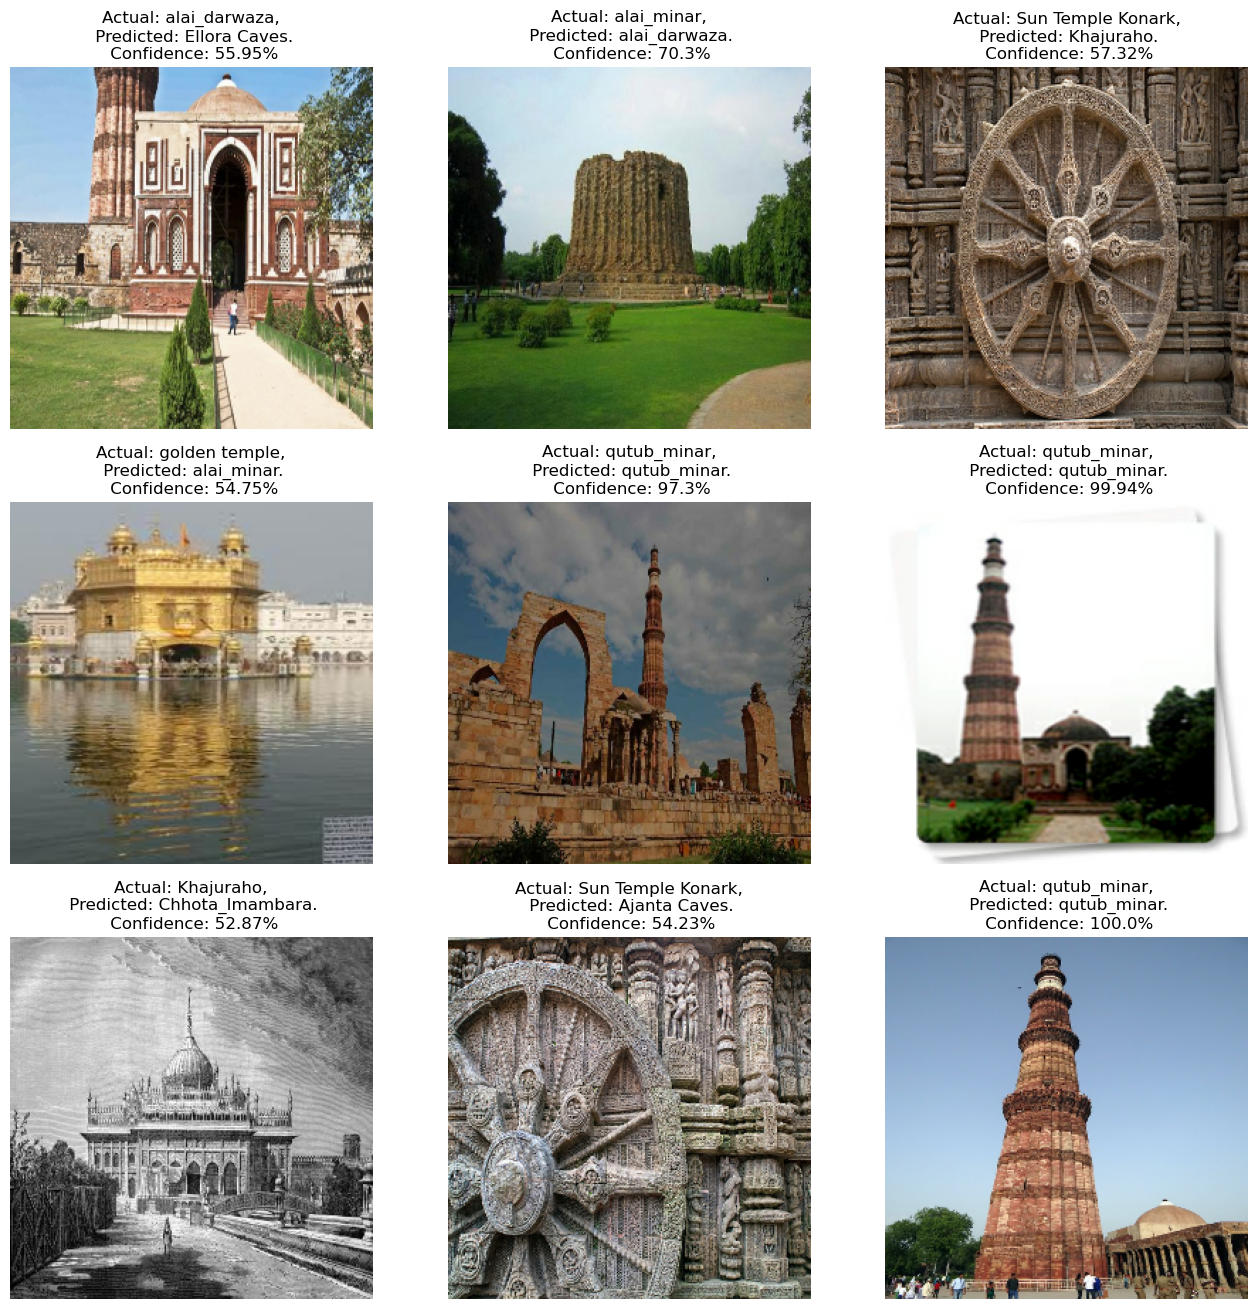

In [46]:
%matplotlib inline

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(16, 16))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off") 
    plt.savefig('sample_predictions.png')

### Visualizing 1st layer using heatmap
This shows how 1st layer of the image filters provided is read and studied by the model Total 32 filters are being studing per layer

conv2d_6 (3, 3, 3, 32)


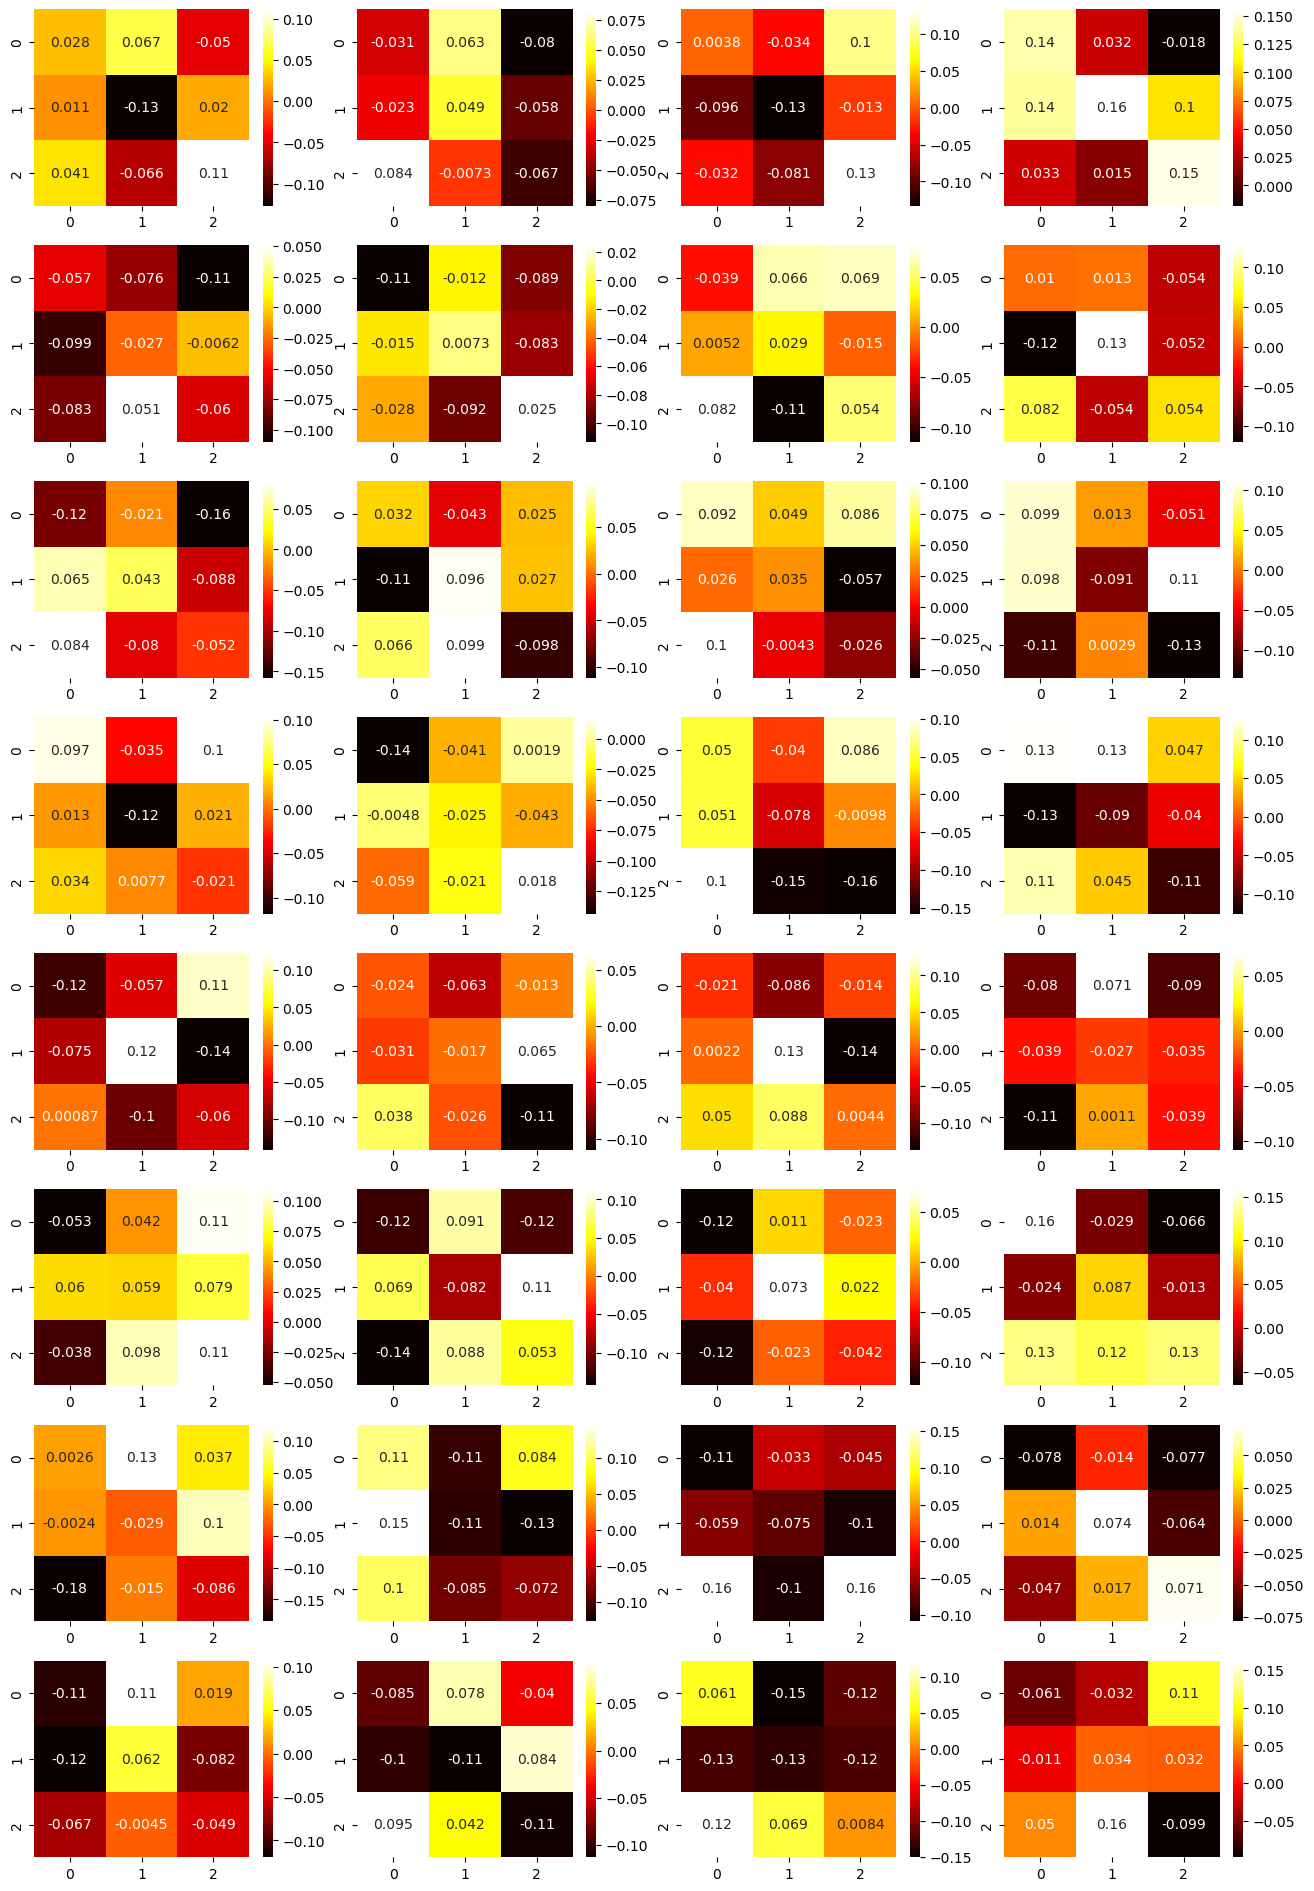

In [47]:
%matplotlib inline

layer = model.layers #Conv layers at 1, 3, 5, 7, 9, 11
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

fig1 = plt.figure(figsize=(16, 24))
columns = 4
rows = 8
n_filters = columns * rows
for i in range(1, n_filters + 1):
    f = filters[:, :, :, i-1]
    fig1 = plt.subplot(rows, columns, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    sns.heatmap(f[:, :, 0], cmap='hot', annot=True)
plt.savefig('layer_heatmap.png')

### Visualizing image reading by the model
This shows how the image is being studied by the model

1/1 [==============================] - 0s 46ms/step


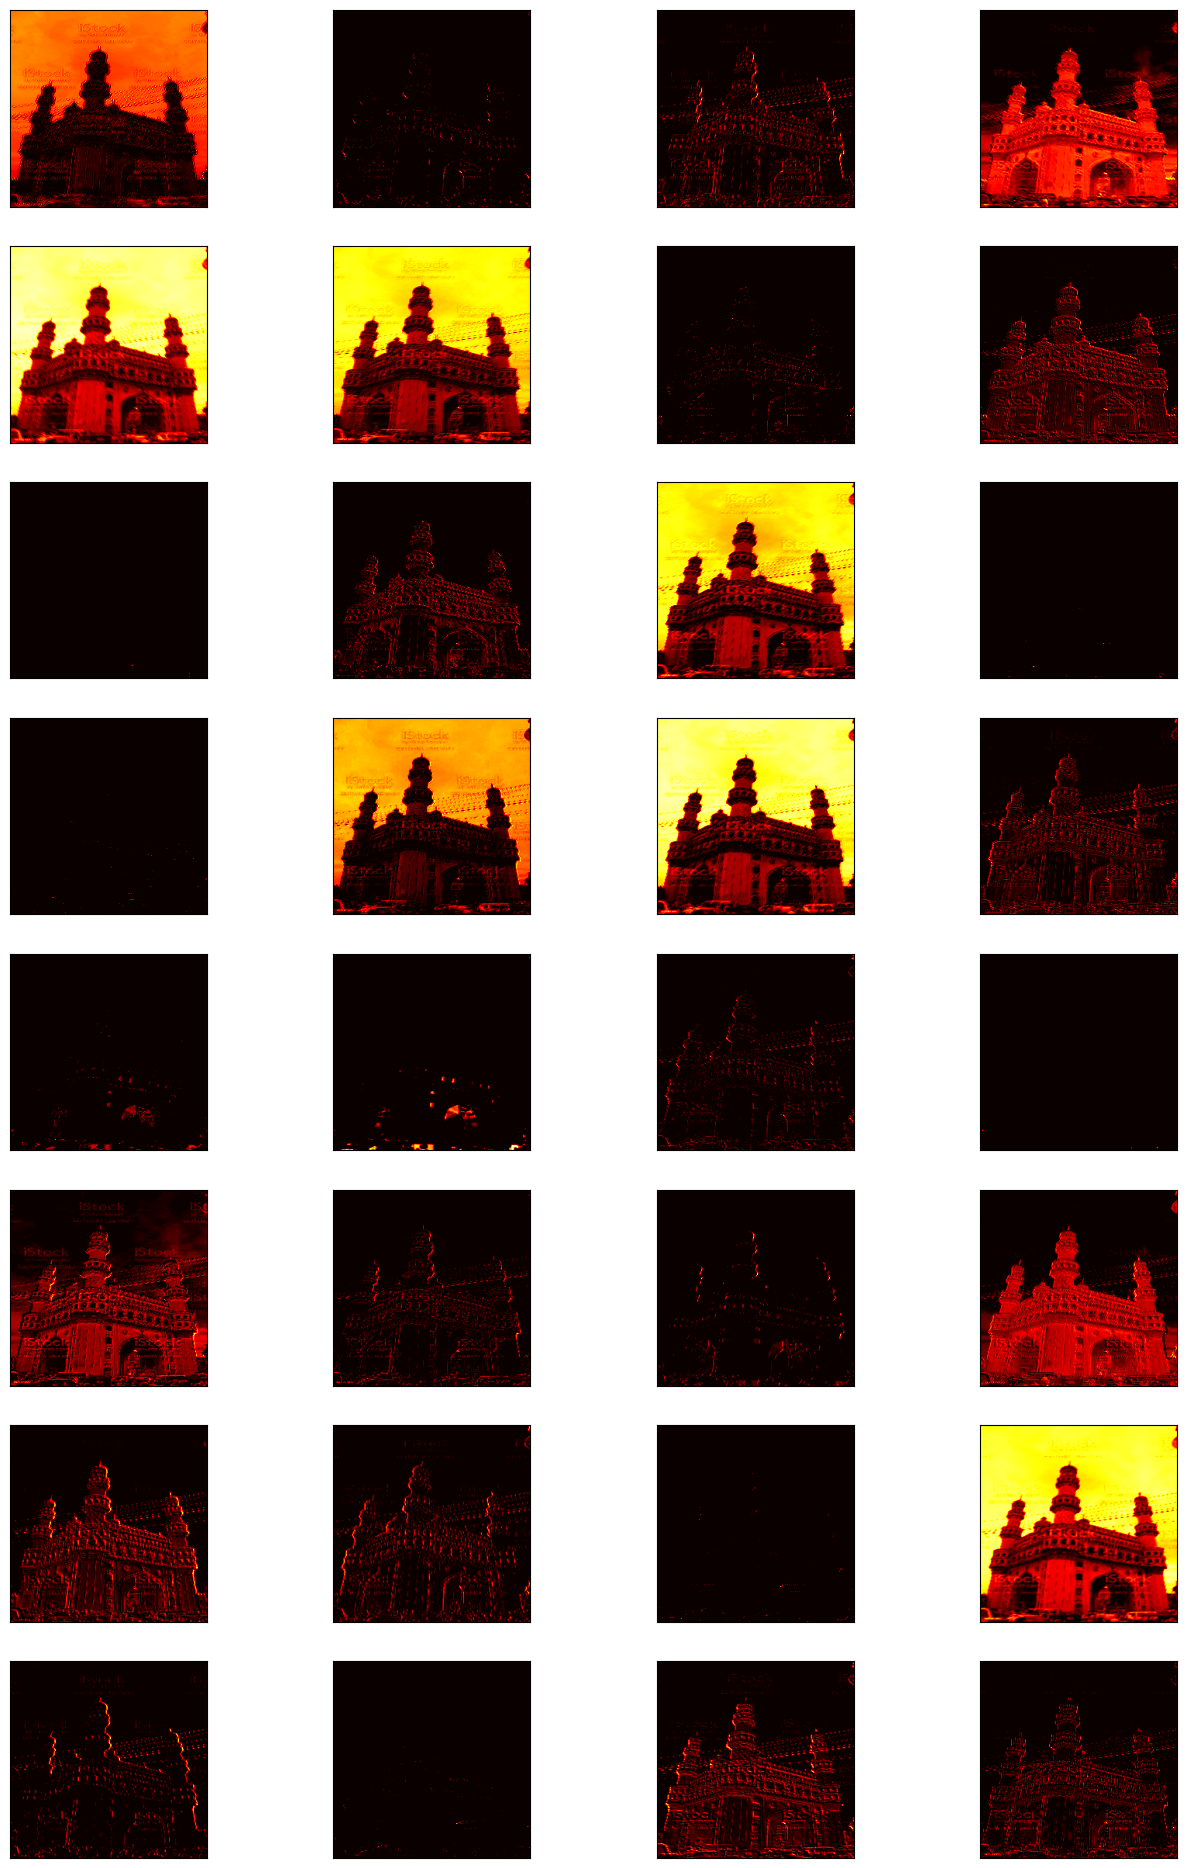

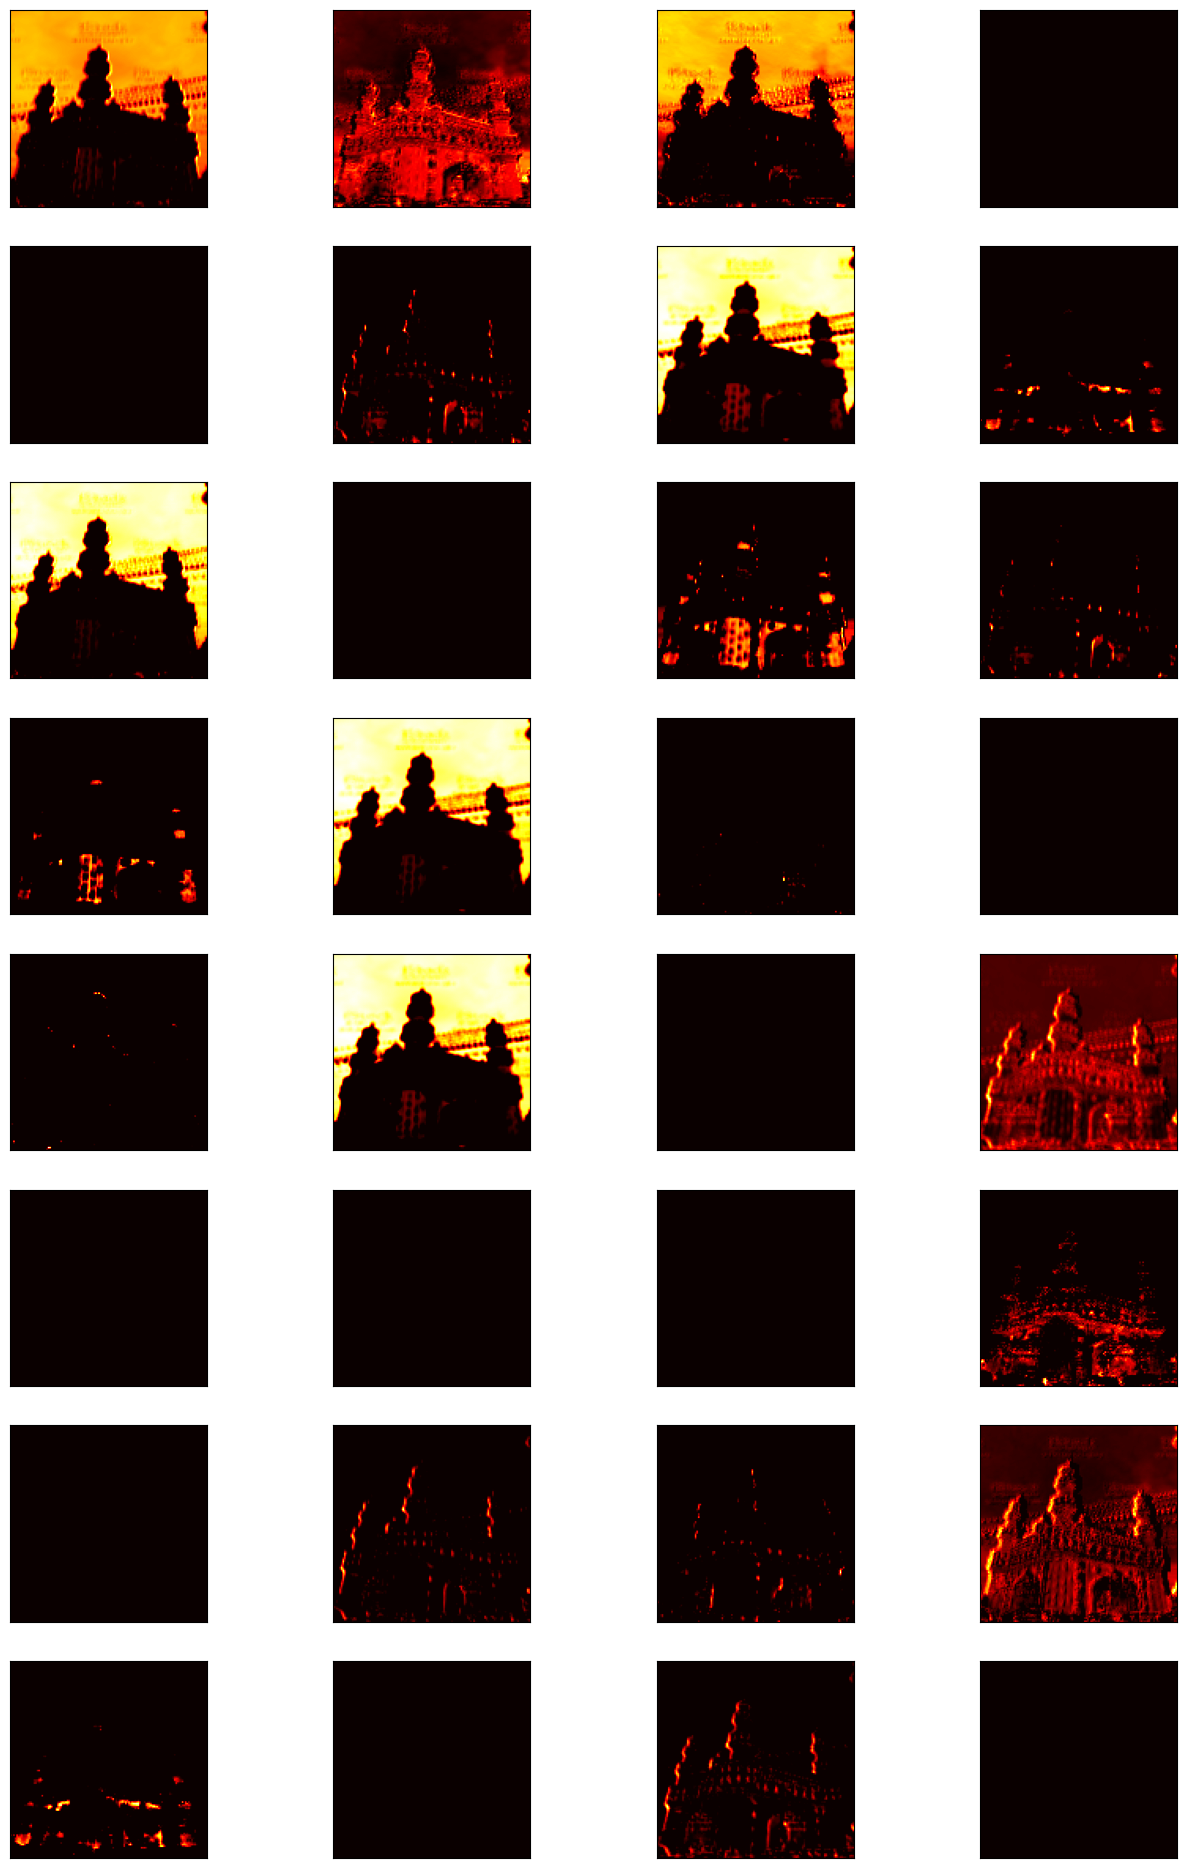

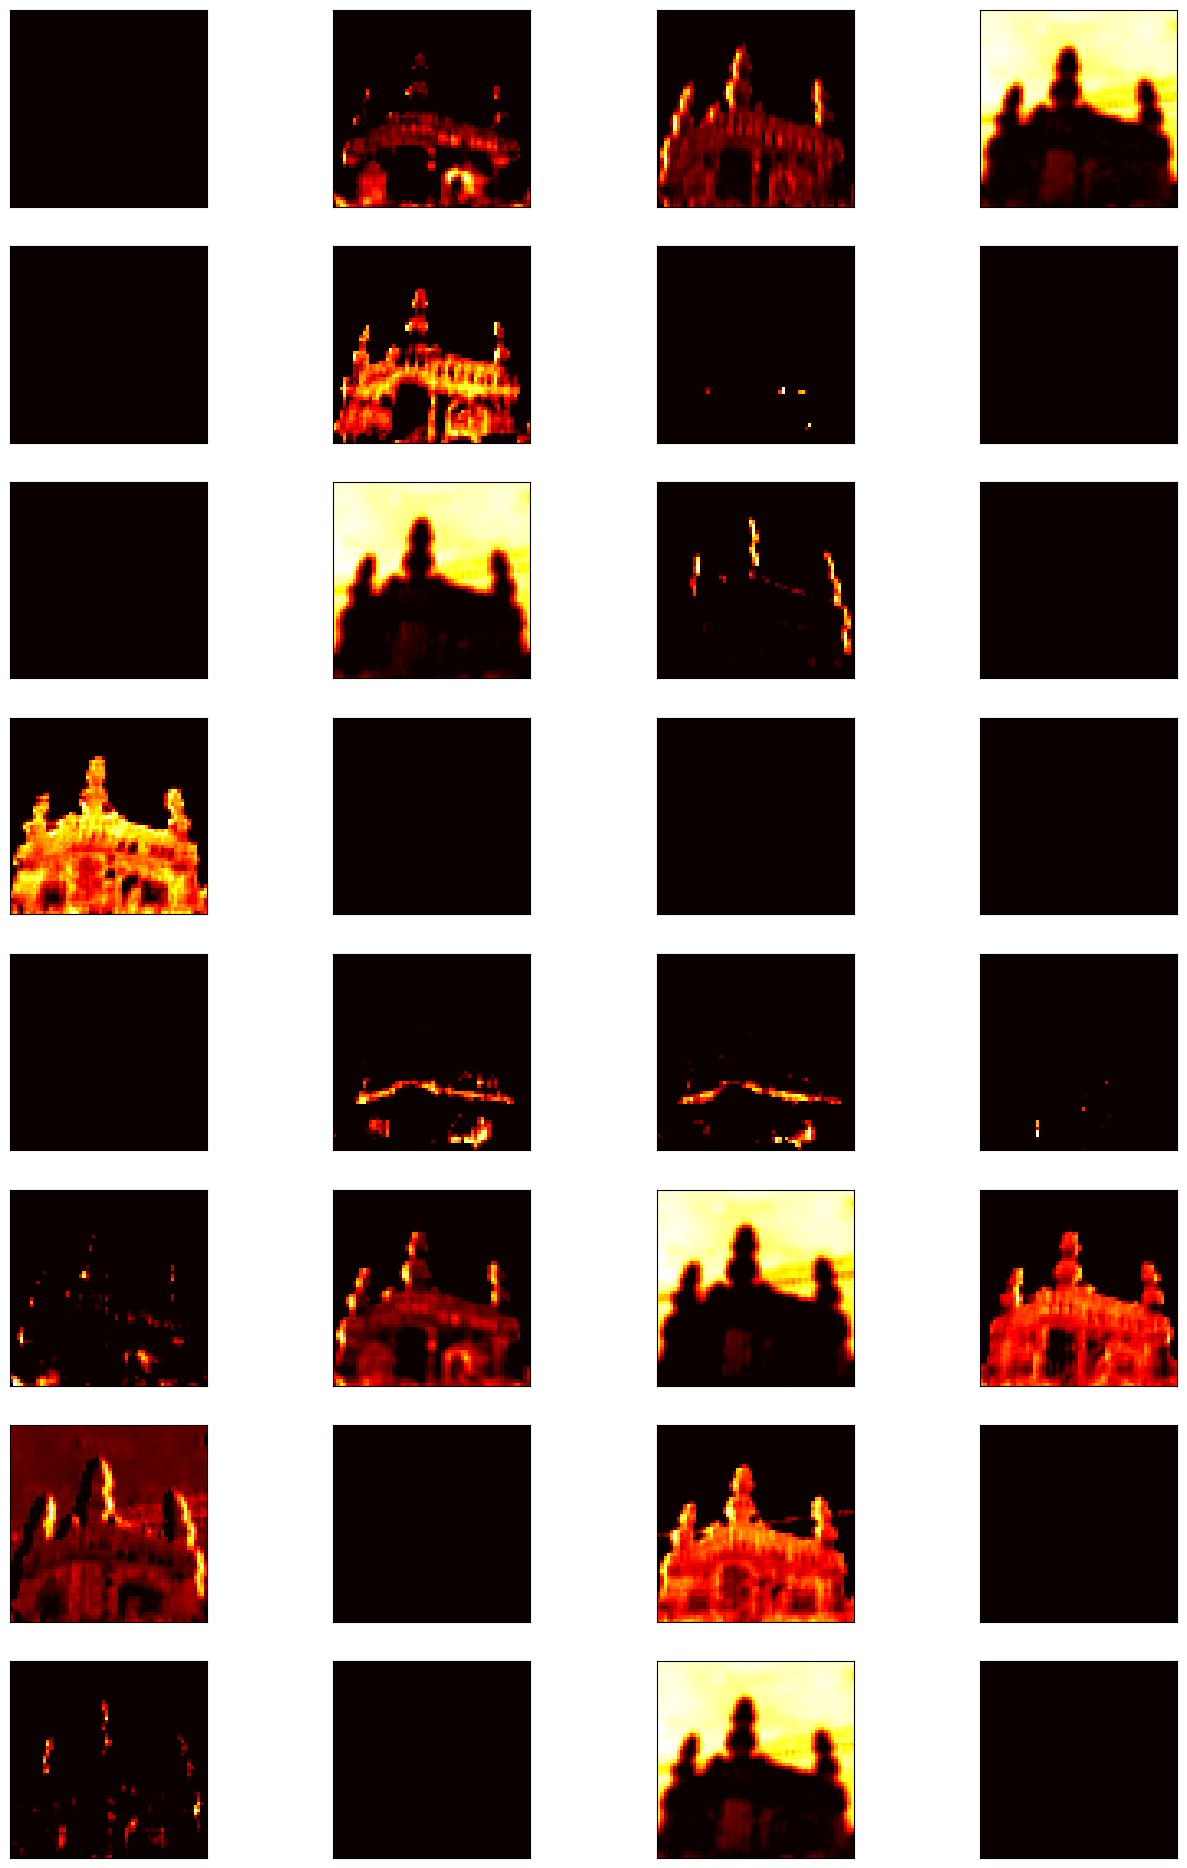

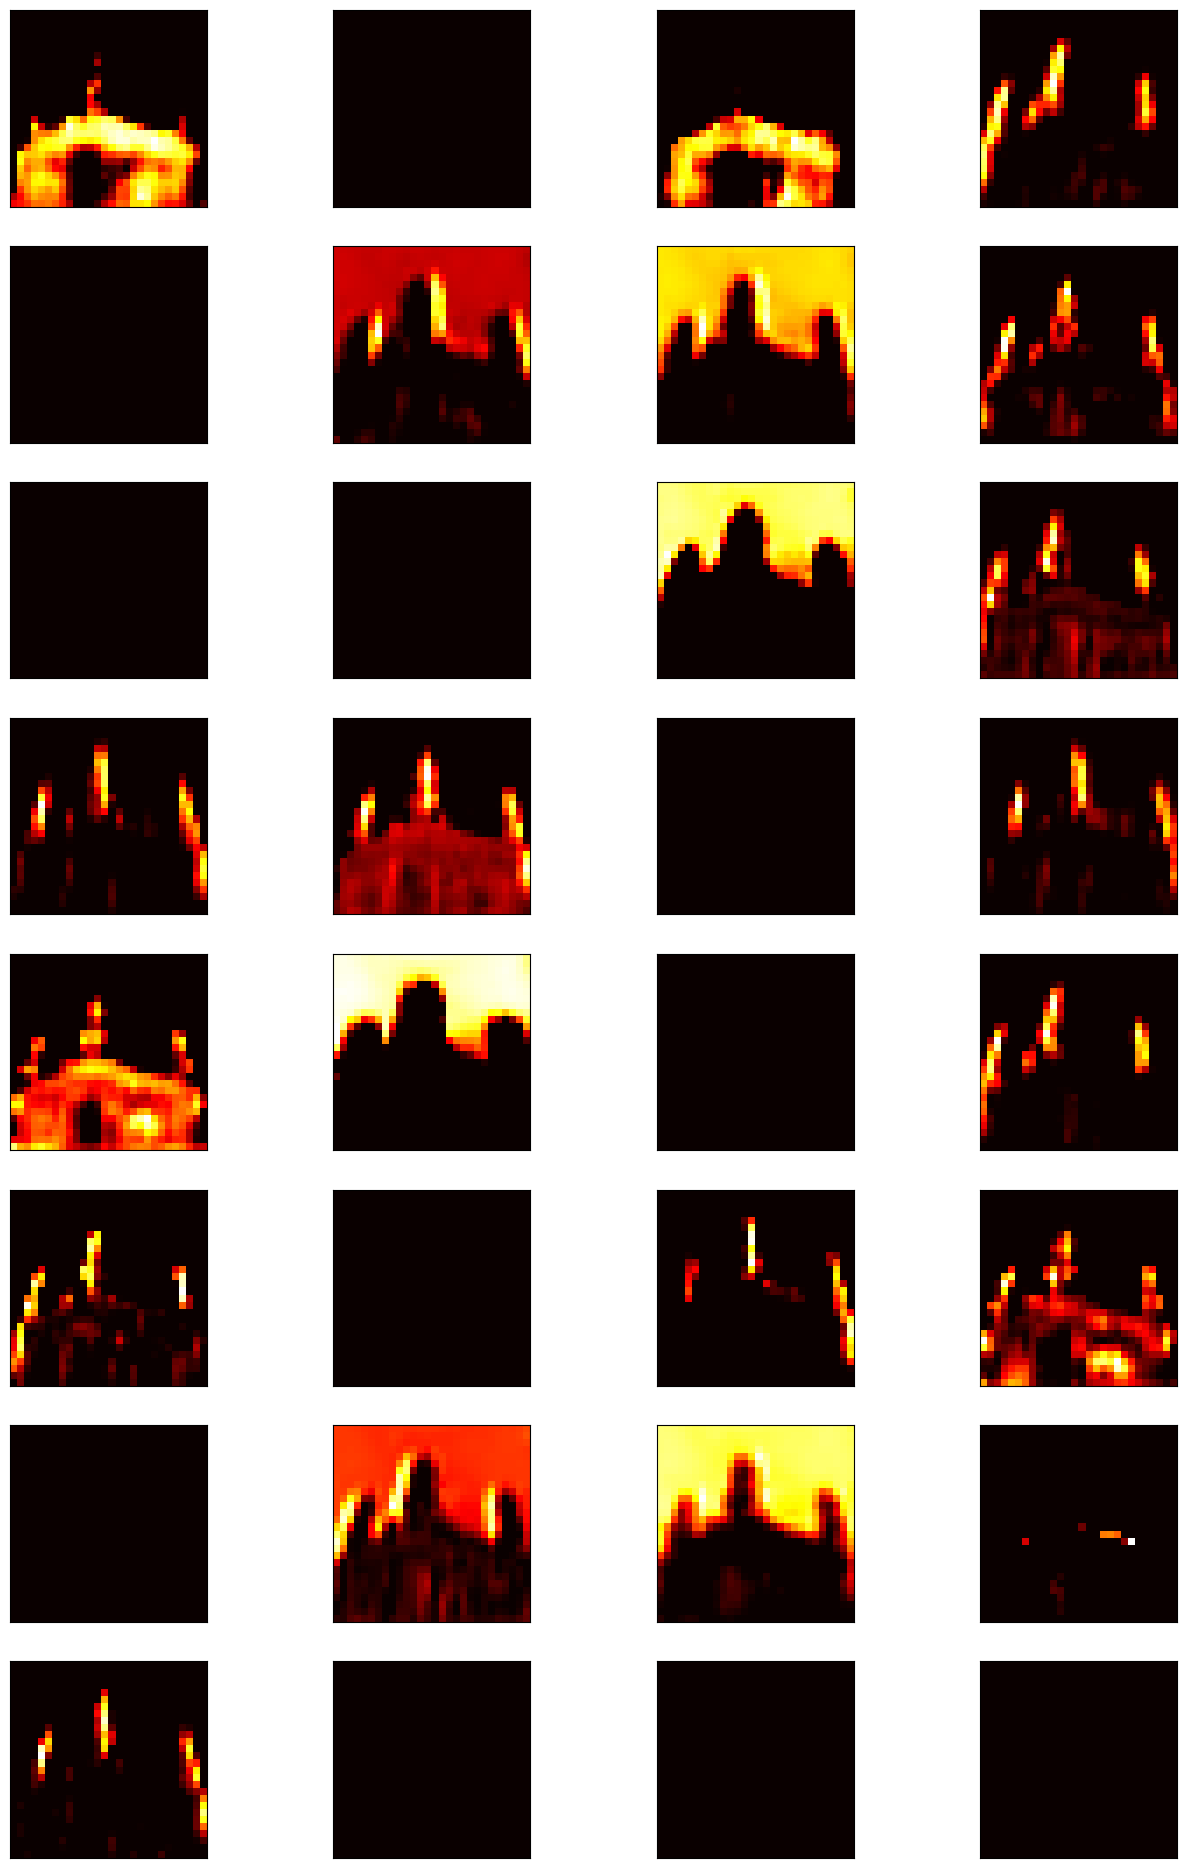

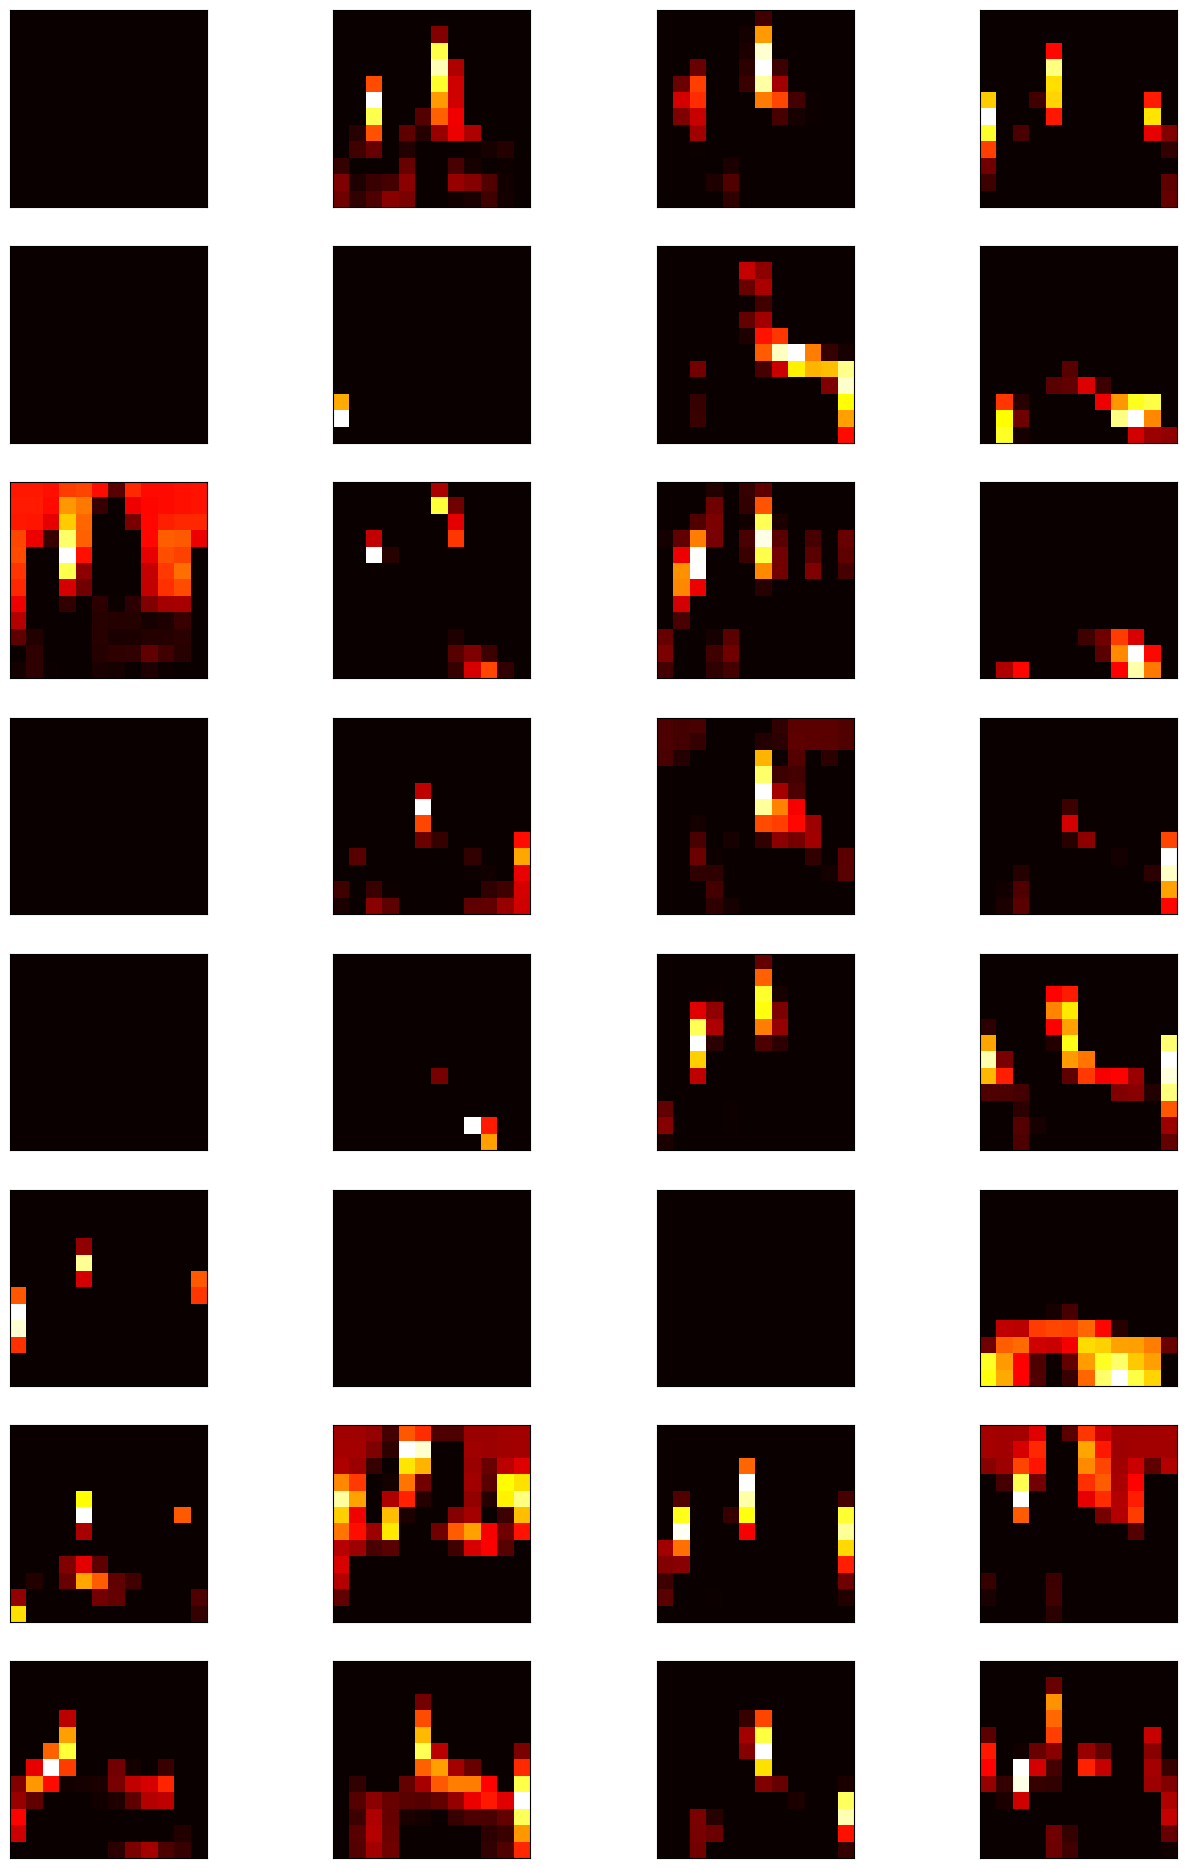

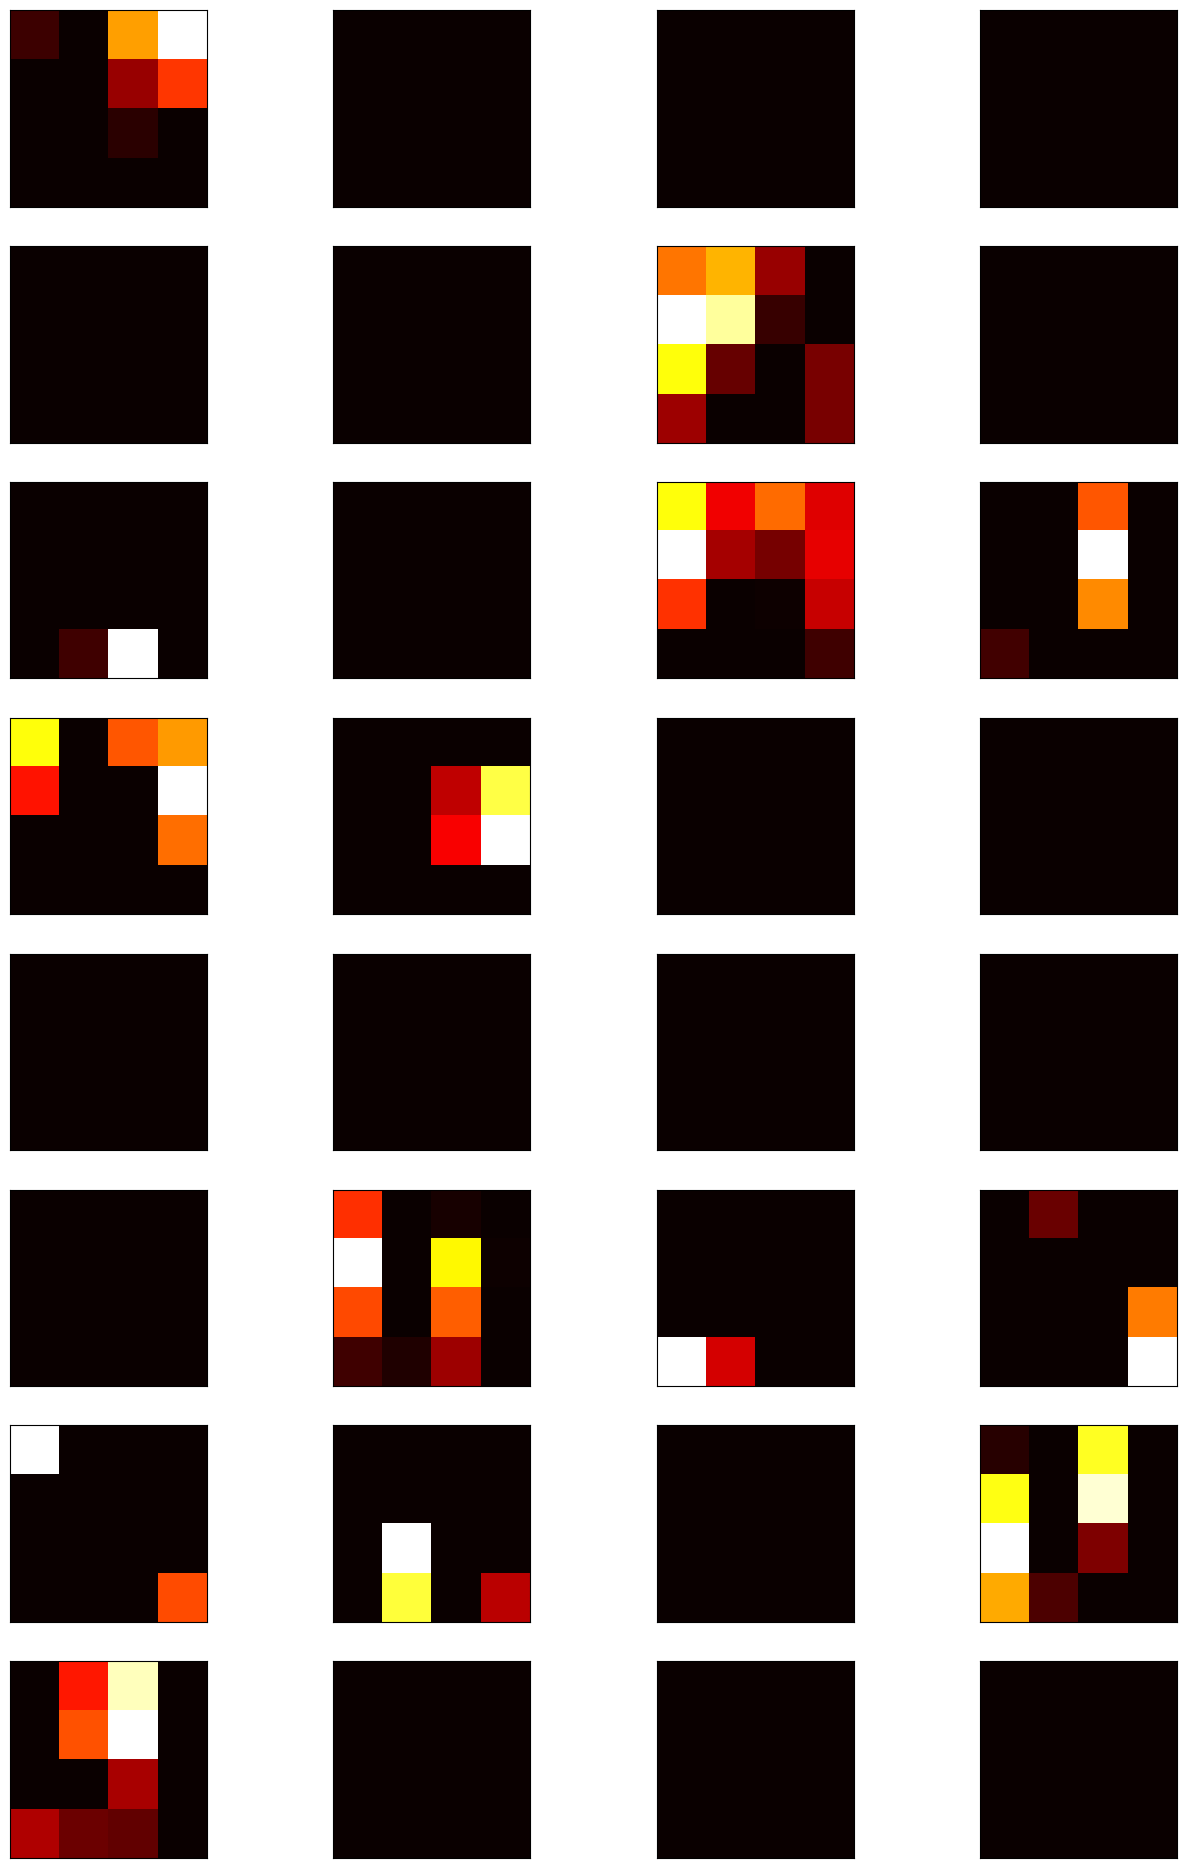

In [48]:
from keras.models import Model
conv_layer_index = [1, 3, 5, 7, 9, 11]
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)

from tensorflow.keras.utils import load_img, img_to_array
%matplotlib inline
img = load_img("test/charminar/35.jpg", target_size=(256, 256)) 
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
feature_output = model_short.predict(img)
columns = 4
rows = 8
for ftr in feature_output:
    fig = plt.figure(figsize=(16, 24))
    for i in range(1, columns*rows +1):
        fig = plt.subplot(rows, columns, i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='hot')
    plt.show()


### Saving the Model

In [23]:
model.save_weights("save_trained_weights.h5")

model.save("monument-model")

INFO:tensorflow:Assets written to: monument-model/assets


INFO:tensorflow:Assets written to: monument-model/assets
